In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

### 1D Gaussian distribution approximation using GAN

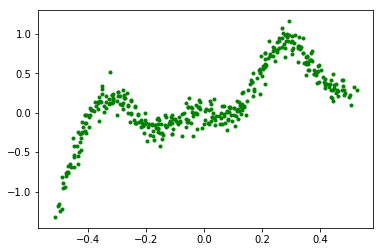

In [2]:
x = np.linspace(0,1,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - x.mean() # good practice to zero-center x in linear mapping
sortindx = np.argsort(x)
x = x[sortindx]
y = y[sortindx]
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [3]:
data = np.c_[xx,yy]
data.shape

(400, 2)

In [4]:
# Noise distribution -> Uniform Distribution
class NoiseDistribution:
    def __init__(self, data_range):
        self.data_range = data_range

    def sample(self, num_samples):
        offset = np.random.random(num_samples) * 0.01
        samples = np.linspace(-self.data_range, self.data_range, num_samples) + offset
        return samples

In [5]:
data_range = 1
noise = NoiseDistribution(data_range)
noise_sample = noise.sample(400)

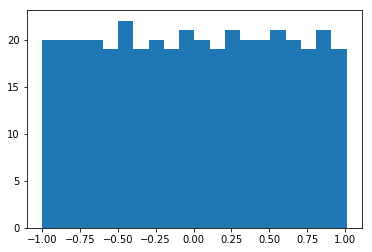

In [6]:
n_bins=20
plt.hist(noise_sample, bins=n_bins)
plt.show()

In [15]:
# Generator model
class Generator(nn.Module):
    def __init__(self, n_hidden=32):
        super().__init__()
        self.actf = nn.ReLU()
#         self.actf = nn.Tanh()
    
        self.layer0x = nn.Linear(1, n_hidden)
        self.layer1x = nn.Linear(n_hidden, 1)
        
        self.layer0y = nn.Linear(1, n_hidden)
        self.layer1y = nn.Linear(n_hidden, 1)

    def forward(self, z):
        x = self.layer0x(z)
        x = self.actf(x)
        x = self.layer1x(x)
        
        y = self.layer0y(z)
        y = self.actf(y)
        y = self.layer1y(y)
        
        xy = torch.cat([x,y], dim=1)
        return xy

In [16]:
# # Discriminator model
# class Discriminator(torch.nn.Module):
#     def __init__(self, n_hidden=32):
#         super().__init__()
# #         self.actf = nn.ReLU()
#         self.actf = nn.Tanh()
    
#         self.layer0x = nn.Linear(1, n_hidden)
#         self.layer1x = nn.Linear(n_hidden, 1)
        
#         self.layer0y = nn.Linear(1, n_hidden)
#         self.layer1y = nn.Linear(n_hidden, 1)
        
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, xy):
#         x, y = xy[:,:1], xy[:,1:]
#         x = self.layer0x(x)
#         x = self.actf(x)
#         x = self.layer1x(x)
        
#         y = self.layer0y(y)
#         y = self.actf(y)
#         y = self.layer1y(y)
        
#         xy = x+y
#         xy = self.sigmoid(xy)
#         return xy

# Discriminator model
class Discriminator(torch.nn.Module):
    def __init__(self, n_hidden=32):
        super().__init__()
        self.actf = nn.ReLU()
#         self.actf = nn.Tanh()
    
        self.layer0 = nn.Linear(2, n_hidden)
        self.layer1 = nn.Linear(n_hidden, 1)
        
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer0(x)
        x = self.actf(x)
        x = self.layer1(x)
        x = self.sigmoid(x)
        return x

In [17]:
G = Generator()
D = Discriminator()

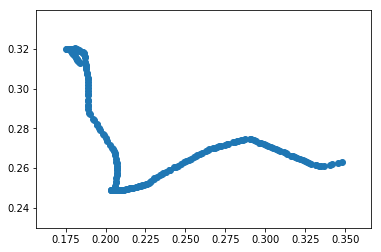

In [18]:
## For Generated values
%matplotlib inline
noise_sample = noise.sample(200)
gen_data = G.forward(torch.Tensor(noise_sample.reshape(-1,1))).data.numpy()
plt.scatter(gen_data[:,0],gen_data[:,1])

In [19]:
# Optimizers
learning_rate=0.01
D_optimizer = torch.optim.SGD(D.parameters(), lr=learning_rate)
G_optimizer = torch.optim.SGD(G.parameters(), lr=learning_rate)
loss_func = torch.nn.BCELoss() # Binary Cross Entropy

D_losses = []
G_losses = []

In [20]:
batch_size = 300
num_epochs = 100000 #3000
num_samples = 10000

0 1.3950322 0.6377781
100 1.3798237 0.67666256
200 1.3799434 0.6839547
300 1.3407006 0.7097853
400 1.4175472 0.6703933
500 1.3245857 0.7536143
600 1.2921665 0.758363
700 1.4326115 0.73105824
800 1.4118485 0.6949087
900 1.3287328 0.6998567
1000 1.3932936 0.7121801
1100 1.3824975 0.69587654
1200 1.3460869 0.70027864
1300 1.4162635 0.6851404
1400 1.3698974 0.70321935
1500 1.3459549 0.7059443
1600 1.4147704 0.68445134
1700 1.3597585 0.70598215
1800 1.3469343 0.6973313
1900 1.409104 0.6862677
2000 1.3722769 0.7049843
2100 1.3395656 0.7083854
2200 1.4152763 0.68094957
2300 1.3905225 0.68337315
2400 1.3234615 0.72534513
2500 1.4165692 0.6882884
2600 1.4209914 0.6578008
2700 1.36099 0.6886309
2800 1.3880746 0.6994113
2900 1.3894435 0.68304586
3000 1.3226888 0.72114843
3100 1.4331188 0.6793885
3200 1.4387348 0.6494371
3300 1.331685 0.7132765
3400 1.3886626 0.7160452
3500 1.4032481 0.66805667
3600 1.368134 0.6855607
3700 1.3769743 0.7103304
3800 1.3830756 0.68609816
3900 1.3420578 0.69995034
400

31700 1.4017372 0.7214168
31800 1.3989472 0.6930386
31900 1.3821442 0.6873022
32000 1.3763597 0.7073685
32100 1.3838503 0.6874159
32200 1.377981 0.6893458
32300 1.3705475 0.7241807
32400 1.3782227 0.6920061
32500 1.3738139 0.6938224
32600 1.442549 0.65327036
32700 1.2692473 0.7983359
32800 1.4043007 0.7201856
32900 1.4005493 0.69620013
33000 1.3738894 0.7044225
33100 1.3754798 0.6970609
33200 1.3782179 0.6958553
33300 1.3761039 0.69058865
33400 1.3522947 0.7117287
33500 1.3879454 0.72024244
33600 1.3839903 0.69889426
33700 1.3757519 0.6879757
33800 1.3716791 0.72027063
33900 1.3900228 0.66890293
34000 1.4156594 0.68101555
34100 1.3934596 0.7072886
34200 1.3730897 0.7055522
34300 1.3789432 0.691139
34400 1.3734288 0.70240897
34500 1.3696373 0.6937456
34600 1.3500824 0.7122367
34700 1.3914407 0.7203073
34800 1.3917874 0.70087284
34900 1.375885 0.6920025
35000 1.3679922 0.7096768
35100 1.381922 0.6878195
35200 1.3761592 0.6893401
35300 1.3728571 0.7010471
35400 1.3358705 0.722644
35500 1.

63100 1.3585914 0.7186051
63200 1.3374631 0.73017836
63300 1.4134763 0.6747169
63400 1.3875448 0.71624386
63500 1.3548311 0.7371185
63600 1.377609 0.68344855
63700 1.3983256 0.6813502
63800 1.3795106 0.69304514
63900 1.3573058 0.7069215
64000 1.348103 0.7125456
64100 1.3408387 0.70403796
64200 1.2620351 0.7796373
64300 1.4281282 0.7436508
64400 1.3275635 0.7851415
64500 1.2960689 0.7371111
64600 1.4110751 0.7168792
64700 1.386255 0.7024956
64800 1.3408133 0.6868142
64900 1.359145 0.72799134
65000 1.4143581 0.6860723
65100 1.3780634 0.62230855
65200 1.3223222 0.8146379
65300 1.3915029 0.66909146
65400 1.3779044 0.6831428
65500 1.4058213 0.6969249
65600 1.3422595 0.6879965
65700 1.3396366 0.78830886
65800 1.5498812 0.5649885
65900 1.4494098 0.59953094
66000 1.3268526 0.8053983
66100 1.3752468 0.67068243
66200 1.3584521 0.7112383
66300 1.4449371 0.66983724
66400 1.344682 0.6889279
66500 1.3215578 0.7969355
66600 1.5373163 0.57270765
66700 1.4637504 0.61551124
66800 1.3360479 0.7727299
669

94400 1.3567846 0.6995432
94500 1.3440212 0.7169113
94600 1.3949522 0.68301564
94700 1.428412 0.65358657
94800 1.4080889 0.7004143
94900 1.3852632 0.7054178
95000 1.382365 0.7027109
95100 1.3498533 0.7137548
95200 1.3804355 0.7133575
95300 1.3696254 0.7020396
95400 1.3643441 0.7015807
95500 1.3350472 0.7266031
95600 1.3605849 0.69242793
95700 1.3697321 0.7107029
95800 1.3441367 0.72415334
95900 1.4920802 0.6635862
96000 1.3952553 0.6956505
96100 1.3813014 0.69773185
96200 1.3676622 0.7043606
96300 1.40032 0.67659533
96400 1.4397368 0.6531971
96500 1.3937998 0.70118207
96600 1.3837191 0.7008269
96700 1.3680358 0.7019437
96800 1.36446 0.70401675
96900 1.3633928 0.71148163
97000 1.2423553 0.82588214
97100 1.3922191 0.73010284
97200 1.3918666 0.68862885
97300 1.4006721 0.67432666
97400 1.3654273 0.6897152
97500 1.3428007 0.70330197
97600 1.357137 0.75310844
97700 1.4036345 0.6726093
97800 1.2259676 0.85849345
97900 1.4191458 0.71791774
98000 1.3869832 0.6965603
98100 1.3967465 0.68930227
9

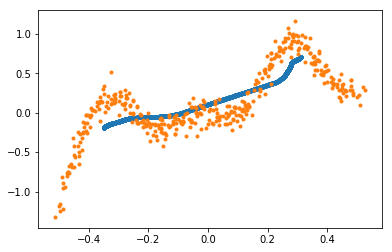

In [21]:
y_real_ = torch.ones([batch_size, 1])
y_fake_ = torch.zeros([batch_size, 1])

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for epoch in range(num_epochs):
    
    # Get Real samples
    x_ = data[np.random.randint(0,400,batch_size)]
    x_ = torch.Tensor(x_)
#     print(x_.shape)
    # Train discriminator with real data
    D_real_output = D(x_)
    D_real_loss = loss_func(D_real_output, y_real_)

    # Generate samples
    z_ = noise.sample(batch_size)
    z_ = torch.Tensor(z_.reshape(-1,1))
    z_ = G(z_)
    
    # Train discriminator with fake data
    D_fake_output = D(z_)
    D_fake_loss = loss_func(D_fake_output, y_fake_)

    # Back propagation
    D_loss = (D_real_loss + D_fake_loss)#/2
    D.zero_grad()
    G.zero_grad()
    D_loss.backward()
    D_optimizer.step()

    # Train generator
    z_ = noise.sample(batch_size)
    z_ = torch.Tensor(z_.reshape(-1,1))
    z_ = G(z_)

    D_fake_output = D(z_)
    G_loss = loss_func(D_fake_output, y_real_) # if discriminator fails, generator wins

    # Back propagation
    D.zero_grad()
    G.zero_grad()
    G_loss.backward()
    G_optimizer.step()

    # Save loss values for plot
    D_losses.append(D_loss.data.numpy())
    G_losses.append(G_loss.data.numpy())

    if epoch % 100 == 0:
        print(epoch, D_loss.data.numpy(), G_loss.data.numpy())
        ax.clear()
        
        ## For Generated values
        noise_sample = noise.sample(num_samples)
        gen_data = G.forward(torch.Tensor(noise_sample.reshape(-1,1))).data.numpy()
        plt.scatter(gen_data[:,0],gen_data[:,1], marker='.', label='generated data')

        ## For Real Data
        plt.scatter(data[:,0],data[:,1], marker='.', label='real data')

        fig.canvas.draw()
        plt.pause(0.01)

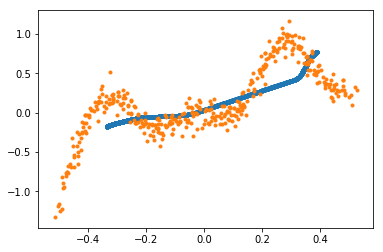

In [22]:
%matplotlib inline
## For Generated values
noise_sample = noise.sample(num_samples)
gen_data = G.forward(torch.Tensor(noise_sample.reshape(-1,1))).data.numpy()
plt.scatter(gen_data[:,0],gen_data[:,1], marker='.', label='generated data')
## For Real Data
plt.scatter(data[:,0],data[:,1], marker='.', label='real data')